In [1]:
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import wordcloud as wc
from PIL import Image

In [2]:
with open('your_posts_1.html', 'rb') as page:
    soup = BeautifulSoup(page, 'html.parser')
    posts = soup.find_all('div', class_="_2pin")

    x = []
    for i in posts:
        x.append(i.get_text())

    y = ' '.join(x)
    stopwords = ['will', 'https', 'image', 'got', 'two', 'talk', 'topic', 'week', 'soon', 'using']
    for i in stopwords:
        y = y.replace(i, '')

(-0.5, 933.5, 533.5, -0.5)

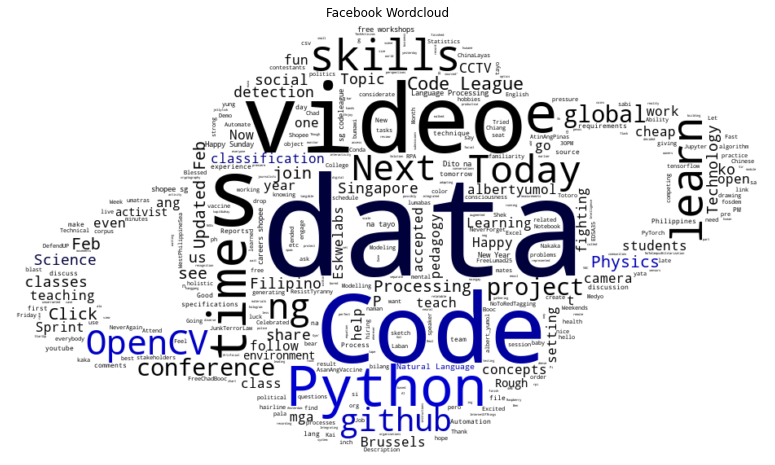

In [3]:
class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (wc.get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = wc.get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = lambda *args, **kwargs: "black"

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

color_to_words = {
    'blue': ['data', 'Python', 'Code', 'Science', 'OpenCV', 'github', 'Physics', 'Natural Language', 'classification']
}

default_color = 'red'
planet_mask = np.array(Image.open("planet.png"))
wordcloud = WordCloud(background_color = 'white', max_words = 2000, width = 1024, height = 720, mask = planet_mask)
wordcloud.generate(y)
grouped_color_func = GroupedColorFunc(color_to_words, default_color)
wordcloud.recolor(color_func=grouped_color_func)

plt.figure(figsize = (20,8))
plt.title('Facebook Wordcloud')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')